First few rows of the dataset:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
Columns after encoding: Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


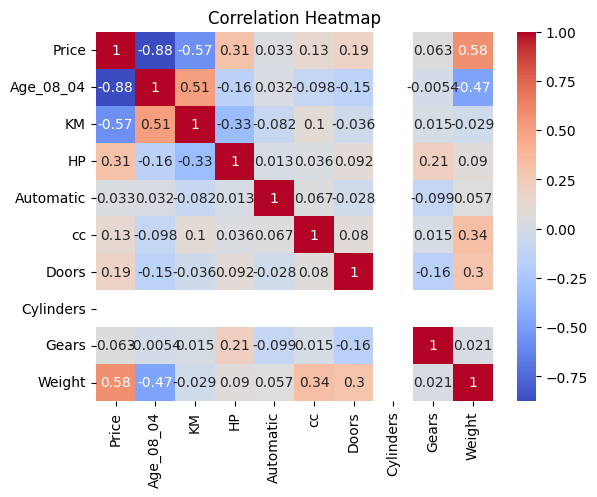

Scaled data:
      Price  Age_08_04        KM        HP  Automatic        cc     Doors  \
0  0.763763  -1.771966 -0.574695 -0.768042  -0.242893  0.997419 -1.085139   
1  0.832715  -1.771966  0.117454 -0.768042  -0.242893  0.997419 -1.085139   
2  0.887877  -1.718184 -0.715386 -0.768042  -0.242893  0.997419 -1.085139   
3  1.163685  -1.610620 -0.547650 -0.768042  -0.242893  0.997419 -1.085139   
4  0.832715  -1.395491 -0.801028 -0.768042  -0.242893  0.997419 -1.085139   

   Cylinders     Gears    Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0        0.0 -0.140425  1.758561              True             False  
1        0.0 -0.140425  1.758561              True             False  
2        0.0 -0.140425  1.758561              True             False  
3        0.0 -0.140425  1.758561              True             False  
4        0.0 -0.140425  1.853577              True             False  
Mean Squared Error (MSE): 0.16758650548094217
R-squared (R2): 0.834888804061108
Model Coefficients

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge


data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

print("First few rows of the dataset:")
print(data.head())

data_encoded = pd.get_dummies(data, drop_first=True)

print("Columns after encoding:", data_encoded.columns)

numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns

sns.heatmap(data_encoded[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

scaler = StandardScaler()
scaled_data = data_encoded.copy()
scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])

print("Scaled data:")
print(scaled_data.head())

X = scaled_data.drop('Price', axis=1)
y = scaled_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

print("Model Coefficients:", model.coef_)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Lasso Regression - MSE:", lasso_mse, "R-squared:", lasso_r2)
print("Ridge Regression - MSE:", ridge_mse, "R-squared:", ridge_r2)
